<font color='Red'>$
{\huge Multiple \ Linear \ Regression \ in \ Python }$</font>



Use NFL 2020 Combine Data to see how we can predict Broad Jump. Photo Credit: NPR

<br>

<div>
<img src="https://media.npr.org/assets/img/2015/02/23/byron-jones_custom-cc92bd2b99ebbf317494a262aa99b71a5a1119bd-s800-c85.webp" width="500"/>
</div>

Side Note: There is a Youtube video associated with this tutorial notebook.

In [12]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="355" src="https://www.youtube.com/embed/EQ4NKbLUVN4?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


${\large Why \ multiple \ linear \ regression? }$

- One event is impacted by multiple factors.
- Considering single factor (e.g., in simple linear regression) might lead to a wrong conclusion in some situation.

<div>
<img src="https://raw.githubusercontent.com/MeetData/multiple_linear_regression_NFL/main/relationships.PNG" width="500"/>
</div>

$$ {\large Broad \ Jump =b_0+ b_1 Weight + b_2 Height }$$

Step 1: Read data into the environment

CSV file: https://raw.githubusercontent.com/MeetData/multiple_linear_regression_NFL/main/NFL_2020_Combine.csv

In [2]:
import pandas as pd
data_NFL=pd.read_csv("https://raw.githubusercontent.com/MeetData/multiple_linear_regression_NFL/main/NFL_2020_Combine.csv")
print(data_NFL)

     Unnamed: 0             Player Pos   Ht   Wt  40yd  Vertical  Bench  \
0             0         Trey Adams  OL  203  318  5.60      24.5    NaN   
1             1     Hakeem Adeniji  OL  193  302  5.17      34.0   26.0   
2             2      McTelvin Agim  DL  190  309  4.98       NaN   27.0   
3             3       Salvon Ahmed  RB  180  197  4.62      34.5    NaN   
4             4      Brandon Aiyuk  WR  183  205  4.50      40.0   11.0   
..          ...                ...  ..  ...  ...   ...       ...    ...   
332         332        D.J. Wonnum  DL  195  258  4.73      34.5   20.0   
333         333  Dom Wood-Anderson  TE  193  261  4.92      35.0    NaN   
334         334     David Woodward  LB  188  230  4.79      33.5   16.0   
335         335        Chase Young  DL  195  264   NaN       NaN    NaN   
336         336      Jabari Zuniga  DL  190  264  4.64      33.0   29.0   

     Broad_Jump  3Cone  Shuttle  
0          92.0    NaN      NaN  
1         115.0    NaN      NaN

Step 2:Use Statsmodels.formula.api to do analysis

In [3]:
from statsmodels.formula.api import ols
res=ols("Broad_Jump~Wt+Ht",data=data_NFL)
res=res.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Broad_Jump   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     113.6
Date:                Tue, 10 May 2022   Prob (F-statistic):           2.82e-35
Time:                        08:32:52   Log-Likelihood:                -767.15
No. Observations:                 239   AIC:                             1540.
Df Residuals:                     236   BIC:                             1551.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    119.2350     12.921      9.228      0.0

<font color='Red'>$
{\huge Danger \ of \ Simple \ Linear \ Regression }$</font>


It sometimes is dangeous to use simple linear regression. For instance, below, if you just put height as the only IV. You will conclude that height is negatively related to broad jump. As we know from multiple linear regression output, this is not true. The reason for this contradition is that, height and weight are correlated. Thus, we need to put both of them into the regression model to avoid such false conclusion. 

In [4]:
from statsmodels.formula.api import ols
res=ols("Broad_Jump~Ht",data=data_NFL)
res=res.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Broad_Jump   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     44.18
Date:                Tue, 10 May 2022   Prob (F-statistic):           2.04e-10
Time:                        08:36:05   Log-Likelihood:                -827.29
No. Observations:                 239   AIC:                             1659.
Df Residuals:                     237   BIC:                             1666.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    209.8378     13.689     15.329      0.0

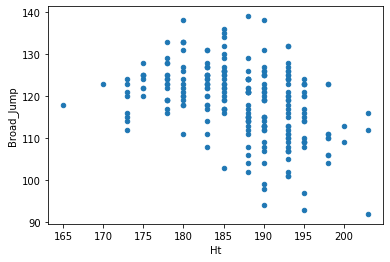

In [5]:
data_NFL.plot(kind="scatter",x="Ht",y="Broad_Jump")

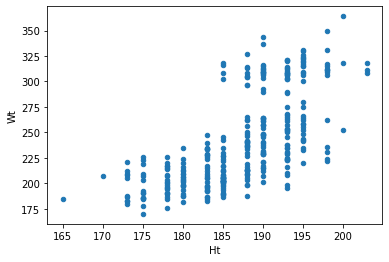

In [6]:
data_NFL.plot(kind="scatter",x="Ht",y="Wt")